In [1]:
import unet
import losses
import engine
import torch
import json
import unet2d 
from torch import nn


class NeuralNetwork(unet2d.UNET,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self)
        unet2d.UNET.__init__(self)


with open('../config/configs.json') as f:
    config = json.load(f)


model=NeuralNetwork()
# losses.LossFunctions.choose(config["loss_function"])
# nn.BCEWithLogitsLoss()
model.compile(loss= losses.DiceLoss(), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
# print("Compile Status")
# print("-------------------------------")
# model.compile_status()

model.load_data(dataset_path=config['dataset']['Barbary'],transformation_flag=True,transformation=config['transformation_size'],batchsize=config['batch_size'],test_size=0)
print("\nData Status")
print("-------------------------------")
model.data_status()

# print("\nTesting After Random Initialization")
# print("-------------------------------")
# model.evaluate_train2d()

print("\nLoading Pretrained Model")
print("-------------------------------")
model.load_checkpoint(config['checkpoint'])

# print("\nTesting After Loading Pretrained Weights")
# print("-------------------------------")
# model.evaluate_train2d()

# print("\nTraining")
# print("-------------------------------")
# model.fit2d(epochs=config['epochs'])

# print("\nTesting After Training")
# print("-------------------------------")
# model.evaluate_train2d()


Data Status
-------------------------------
Batch Shape of Training Features: (1, 64, 64, 32) torch.float32
Batch Shape of Training Labels: (1, 64, 64, 32) torch.float32

Loading Pretrained Model
-------------------------------
=> Loading checkpoint


In [2]:
import torch

print("\nPrediction")
print("-------------------------------")
ImagePath=config['PredictPath']
# Image=torch.asarray(nib.load(ImagePath).get_fdata())
predicted_label,true_label,processed_volume=model.pred2d(ImagePath)
print(predicted_label.shape,true_label.shape,processed_volume.shape)


Prediction
-------------------------------
batch: 1/5
batch: 2/5
batch: 3/5
batch: 4/5
batch: 5/5
(5, 1, 64, 64, 32) (5, 1, 64, 64, 32) (5, 1, 64, 64, 32)


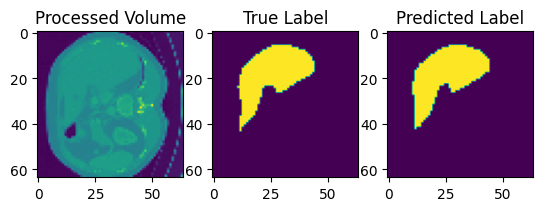

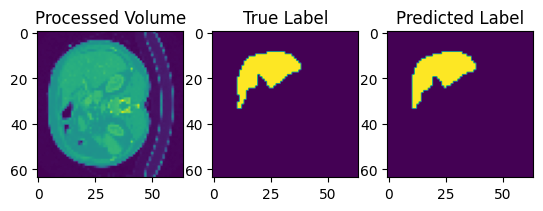

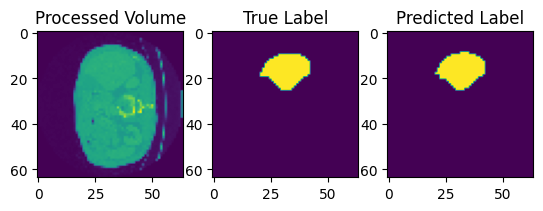

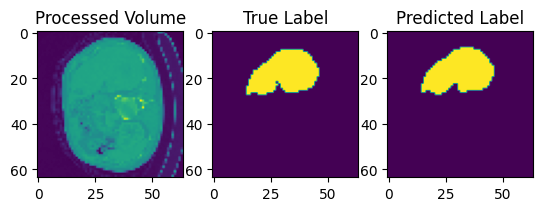

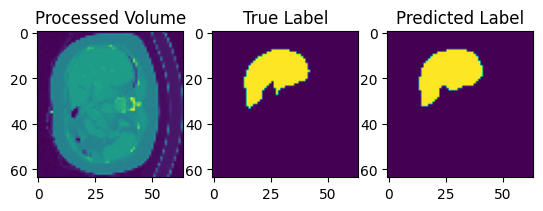

In [3]:
import matplotlib.pyplot as plt
for i in range (predicted_label.shape[0]):
    volume_batch=processed_volume[i]
    plt.subplot(1,3,1)
    plt.imshow(volume_batch[0,:,:,16])
    plt.title("Processed Volume")
    predicted_batch=predicted_label[i]
    plt.subplot(1,3,3)
    plt.imshow(predicted_batch[0,:,:,16])
    plt.title("Predicted Label")
    true_batch=true_label[i]
    plt.subplot(1,3,2)
    plt.imshow(true_batch[0,:,:,16])
    plt.title("True Label")
    plt.show()


2022-11-19 22:19:33,937 - Animation.save using <class 'matplotlib.animation.PillowWriter'>


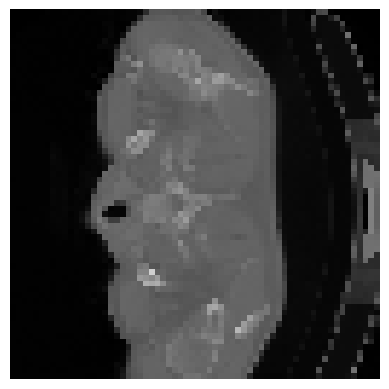

In [5]:
import utils
overlay=utils.gray_to_colored_from_array(processed_volume[3][0],true_label[3][0],mask2=predicted_label[3][0])
utils.animate(overlay,'mask_prediction_overlay.gif')


In [ ]:
import numpy as np
import nibabel as nib

ni_img = nib.Nifti1Image(np.asarray(output[0][0][0]), affine=np.eye(4))
nib.save(ni_img, "nifti_prediction.nii")

In [5]:
# # if model is better uncomment this line
# model.save_checkpoint(config['checkpoint'])

=> Saving checkpoint
